In [22]:
from pyspark.ml.regression import IsotonicRegression
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
import numpy as np
import matplotlib.pyplot as plt

In [23]:
spark_session = SparkSession\
        .builder\
        .appName("Spark Regression")\
        .getOrCreate()
dataset = spark_session\
        .read\
        .format("libsvm")\
        .load("libsvm2.txt")


In [25]:
# the technique of fitting a free-form line to a sequence of observations such that the fitted 
#line is non-decreasing (or non-increasing) 
#everywhere, and lies as close to the observations as possible.

ir = IsotonicRegression(featuresCol = 'features', labelCol = 'label',)
dataset.printSchema()
dataset.show()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)

+----------+--------------------+
|     label|            features|
+----------+--------------------+
|115.970001|(10,[0,1,2,3,4,5,...|
|    116.32|(10,[0,1,2,3,4,5,...|
|118.690002|(10,[0,1,2,3,4,5,...|
|119.029999|(10,[0,1,2,3,4,5,...|
|114.949997|(10,[0,1,2,3,4,5,...|
|110.440002|(10,[0,1,2,3,4,5,...|
|108.769997|(10,[0,1,2,3,4,5,...|
|108.860001|(10,[0,1,2,3,4,5,...|
|    115.32|(10,[0,1,2,3,4,5,...|
|111.199997|(10,[0,1,2,3,4,5,...|
|116.599998|(10,[0,1,2,3,4,5,...|
|115.050003|(10,[0,1,2,3,4,5,...|
|115.040001|(10,[0,1,2,3,4,5,...|
|    115.75|(10,[0,1,2,3,4,5,...|
|116.870003|(10,[0,1,2,3,4,5,...|
|117.510002|(10,[0,1,2,3,4,5,...|
|115.980003|(10,[0,1,2,3,4,5,...|
|119.019997|(10,[0,1,2,3,4,5,...|
|120.709999|(10,[0,1,2,3,4,5,...|
|121.190002|(10,[0,1,2,3,4,5,...|
+----------+--------------------+
only showing top 20 rows



In [7]:
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = dataset.randomSplit([0.7, 0.3])
print(trainingData.select("label").show(10))

train_model = ir.fit(trainingData)

+---------+
|    label|
+---------+
|35.547501|
|  36.7075|
|36.982498|
|     37.5|
|37.682499|
|  37.6875|
|38.174999|
|38.325001|
|38.327499|
|38.450001|
+---------+
only showing top 10 rows

None


In [8]:
#cvModel = train_model.fit(trainingData)

In [9]:

predictions = train_model.transform(testData)

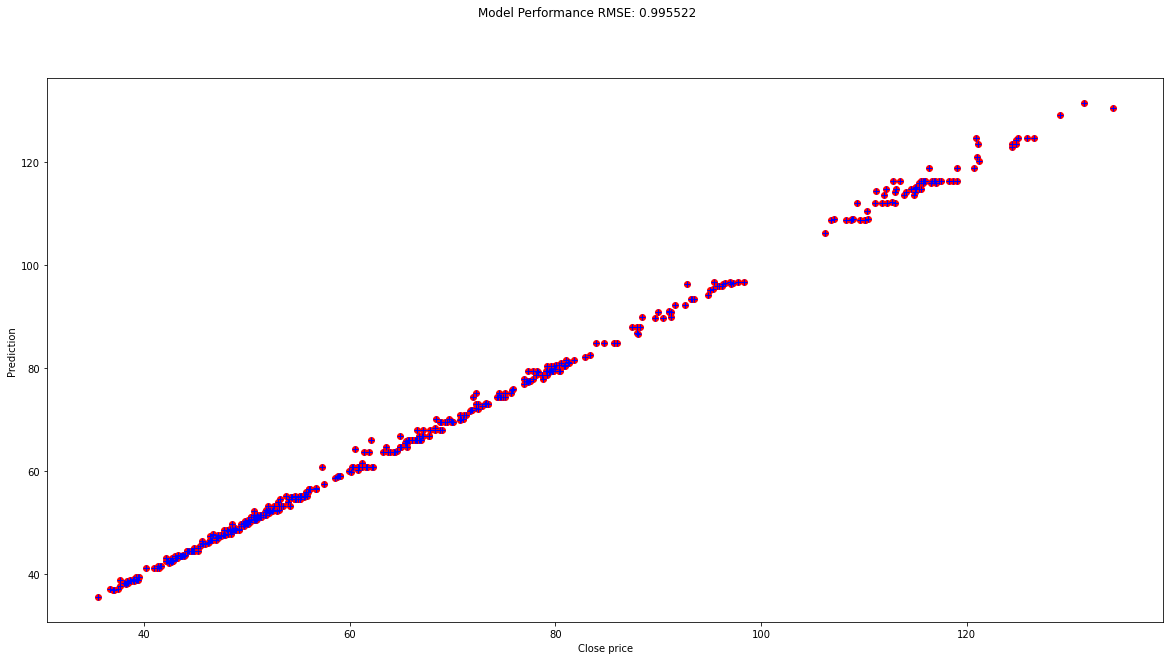

0.9955216639074095


In [10]:

evaluator= RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)

rfPred = train_model.transform(dataset)

rfResult = rfPred.toPandas()
plt.figure(figsize=(20,10))
plt.plot(rfResult.label, rfResult.prediction, 'b+')
plt.scatter(rfResult.label, rfResult.prediction, color="red")

plt.xlabel('Close price')
plt.ylabel('Prediction')
plt.suptitle("Model Performance RMSE: %f" % rmse)
plt.show()

print(rmse)

In [12]:
rmse

0.9955216639074095

In [15]:
train_model.transform(dataset).show()

+----------+--------------------+------------------+
|     label|            features|        prediction|
+----------+--------------------+------------------+
|115.970001|(10,[0,1,2,3,4,5,...|       116.2849995|
|    116.32|(10,[0,1,2,3,4,5,...|        118.683332|
|118.690002|(10,[0,1,2,3,4,5,...|       116.3440004|
|119.029999|(10,[0,1,2,3,4,5,...|       116.3440004|
|114.949997|(10,[0,1,2,3,4,5,...|114.75400100000002|
|110.440002|(10,[0,1,2,3,4,5,...|108.80666866666667|
|108.769997|(10,[0,1,2,3,4,5,...|108.71499939999998|
|108.860001|(10,[0,1,2,3,4,5,...|108.80666866666667|
|    115.32|(10,[0,1,2,3,4,5,...|115.84249899999999|
|111.199997|(10,[0,1,2,3,4,5,...| 114.2668752666056|
|116.599998|(10,[0,1,2,3,4,5,...|       116.2849995|
|115.050003|(10,[0,1,2,3,4,5,...|        115.040001|
|115.040001|(10,[0,1,2,3,4,5,...|        115.040001|
|    115.75|(10,[0,1,2,3,4,5,...|       116.3440004|
|116.870003|(10,[0,1,2,3,4,5,...|       116.3440004|
|117.510002|(10,[0,1,2,3,4,5,...|       116.34

In [155]:
rmse

1.086708867738283